In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [14]:
# 이미지 읽기
img_bgr: np.ndarray = cv2.imread('data/doraemon.png', cv2.IMREAD_COLOR)
type(img_bgr), img_bgr.shape

(numpy.ndarray, (231, 200, 3))

In [16]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)
type(x_bgr), x_bgr.shape

(torch.Tensor, torch.Size([3, 231, 200]))

In [17]:
x_bgr = x_bgr[None,...].float() / 255. # channel 은 건들지 않고 h, w 값에 대해 /255

In [18]:
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

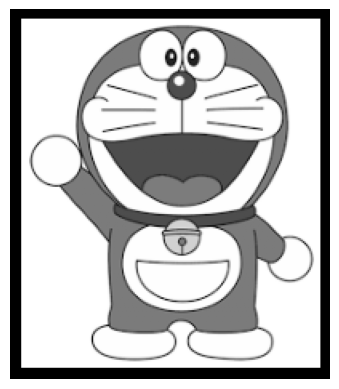

In [19]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

imshow(x_gray)

## 1st order derivates

https://kornia.readthedocs.io/en/latest/filters.html?highlight=spatial_gradient#kornia.filters.spatial_gradient

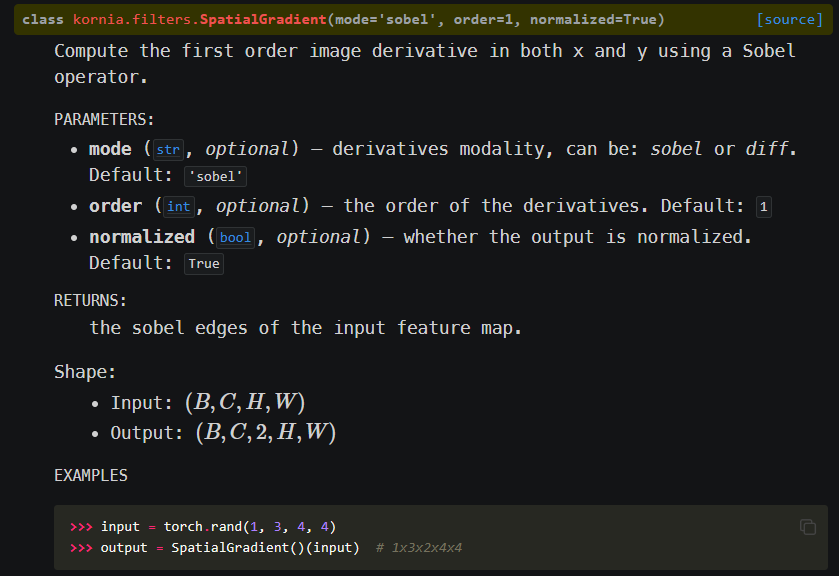

In [20]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1)
# input : BxCxHxW
# output : BxCx2xHxW ( x, y 방향 grad)
grads.shape

torch.Size([1, 1, 2, 231, 200])

In [21]:
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

grads_x.shape

torch.Size([1, 1, 231, 200])

* Torch.clamp()

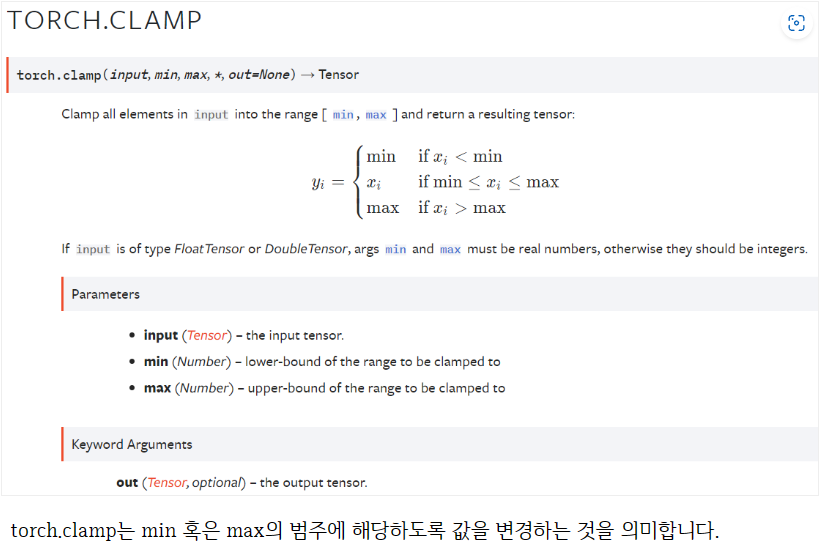

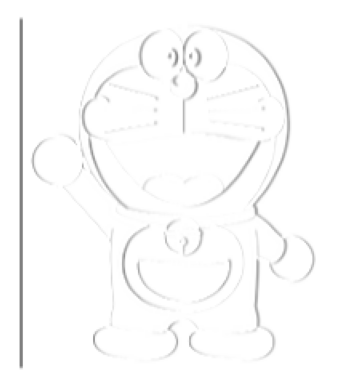

In [22]:
# Show first derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

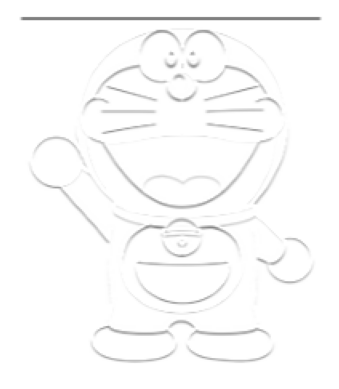

In [23]:
# Show first derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## 2nd order derivatives

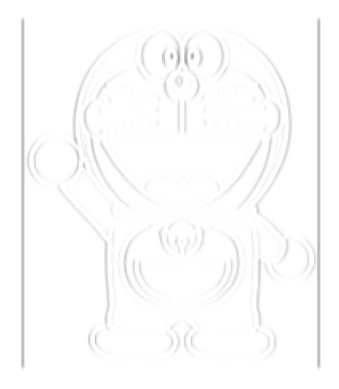

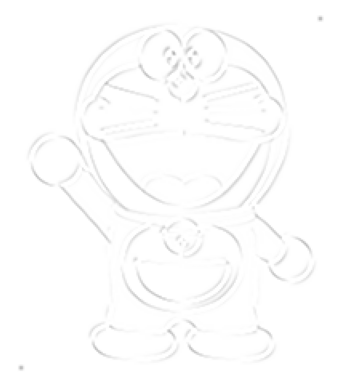

In [28]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

# Show second derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

# Show second derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## Edges detection

x, y 축의 grad 로 sobel edge, laplacian edge, canny edge를 생성, kornia에 이미 함수로 구현 되어 있습니다.

https://kornia.readthedocs.io/en/latest/filters.html?highlight=sobel#kornia.filters.Sobel

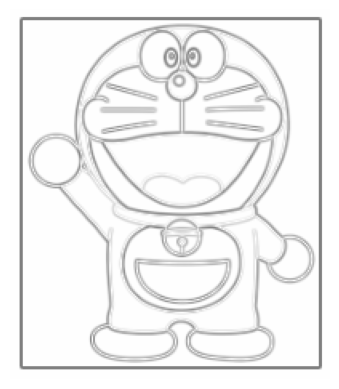

In [29]:
x_sobel: torch.Tensor = K.filters.sobel(x_gray)
imshow(1. - x_sobel)

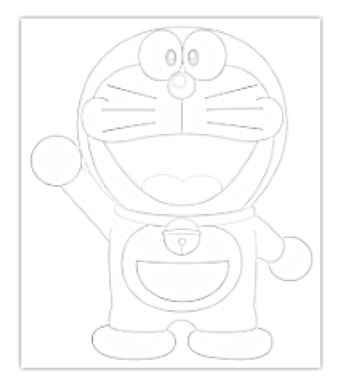

In [30]:
x_laplacian: torch.Tensor = K.filters.laplacian(x_gray, kernel_size=5)
imshow(1. - x_laplacian.clamp(0., 1.))

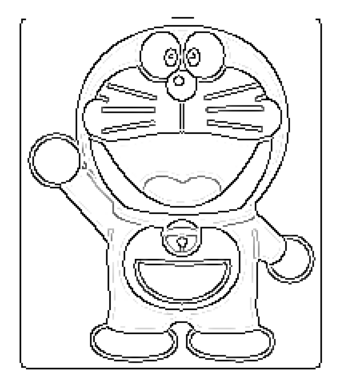

In [31]:
x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1. - x_laplacian.clamp(0., 1.))